In [722]:
import pandas as pd

x1 = pd.ExcelFile('celebrity_deaths_2016.xlsx')
print(x1.sheet_names)


['celeb_death', 'cause_of_death']


In [723]:
df = x1.parse('celeb_death')
top5 = df.head(5)
top5


c:\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,date of death,name,age,bio,cause_id
0,2016-01-01,Tony Lane,71,American art director (Rolling Stone),8915.0
1,2016-01-01,Gilbert Kaplan,74,American conductor and businessman,2860.0
2,2016-01-01,Brian Johns,79,"Australian company director, managing director...",2860.0
3,2016-01-01,Natasha Aguilar,45,"Costa Rican swimmer, silver and bronze medalis...",33897.0
4,2016-01-01,Fazu Aliyeva,83,Russian Avar poet and journalist,10648.0


In [724]:
df_types = df.dtypes
df_shape = df.shape
print(df_types)
print(df_shape)


date of death    datetime64[ns]
name                     object
age                      object
bio                      object
cause_id                float64
dtype: object
(6594, 5)


In [725]:
df = df.drop_duplicates()


In [726]:
cause_of_death = x1.parse('cause_of_death')
cause_top_5 = cause_of_death.head(5)
cause_top_5


c:\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,cause_id,cause of death
0,753,ALS
1,1039,bomb
2,1120,shot
3,1499,fall
4,1629,shot


In [727]:
cause_of_death.drop_duplicates(subset='cause_id')


,cause_id,cause of death
0,753,ALS
1,1039,bomb
2,1120,shot
3,1499,fall
4,1629,shot
...,...,...
344,116752,injuries sustained in Brussels Airport bombings
345,119640,complications from a fall and Alzheimer's dis...
346,129613,complications from esophageal cancer and pneu...
347,133339,pneumonia as a complication from a kidney inf...


In [728]:
df = df.merge(cause_of_death, how='left', on='cause_id')
df_top5 = df.head(5)
df_top5


,date of death,name,age,bio,cause_id,cause of death
0,2016-01-01,Tony Lane,71,American art director (Rolling Stone),8915.0,brain cancer
1,2016-01-01,Gilbert Kaplan,74,American conductor and businessman,2860.0,cancer
2,2016-01-01,Brian Johns,79,"Australian company director, managing director...",2860.0,cancer
3,2016-01-01,Natasha Aguilar,45,"Costa Rican swimmer, silver and bronze medalis...",33897.0,complications of a stroke
4,2016-01-01,Fazu Aliyeva,83,Russian Avar poet and journalist,10648.0,heart failure


In [729]:
df['age'] = pd.to_numeric(df['age'], errors='coerce').dropna()


In [730]:
avg_age = df['age'].mean()
print(avg_age)


76.99418159546777


In [731]:
count = len(df[df['age'] > 70].index)
print(count)


4760


In [732]:
df_youngest = df[df['age'] == df['age'].min()]
youngest_name = df_youngest.iloc[0]['name']
youngest_cause = df_youngest.iloc[0]['cause of death']
print(youngest_name)
print(youngest_cause)


Vautour
 euthanised


In [733]:
df['bio'] = df['bio'].astype(str)


In [734]:
df_american = df[df['bio'].str.contains('American')]
count_american = len(df_american.index)
print(count_american)


2143


In [735]:
import random
random.seed(0)

df_died_50 = df[
    (df['age'] == 50) &
    (df['cause of death'].notnull()) &
    (df['cause of death'].str.contains('unknown') == False)]
causes_of_death = df_died_50['cause of death'].unique()
rand_cause = causes_of_death[random.randint(0, causes_of_death.size - 1)]
print(rand_cause.strip())


traffic collision


In [736]:
import numpy as np

df_grouped_cause = df[['cause of death', 'age']
                      ].groupby('cause of death').mean()
df_grouped_cause


,age
cause of death,
Alzheimer's disease,79.590909
Myself and I),76.000000
Parkinson's disease,80.200000
Parkinson's disease and multiple myeloma,69.000000
Pick's disease,68.000000
...,...
plane crash,55.500000
progressive supranuclear palsy,84.000000
shot,56.500000


In [737]:
def get_month(date):
    return date.month


df['month'] = df.apply(lambda row: get_month(row['date of death']), 1)


In [738]:
def get_year(date):
    return date.year


df['year'] = df.apply(lambda row: get_year(row['date of death']), 1)


In [739]:
df_2016 = df[df['year'] == 2016]


In [740]:
df_per_month = df_2016.groupby(
    'month')['month'].count().reset_index(name='count')


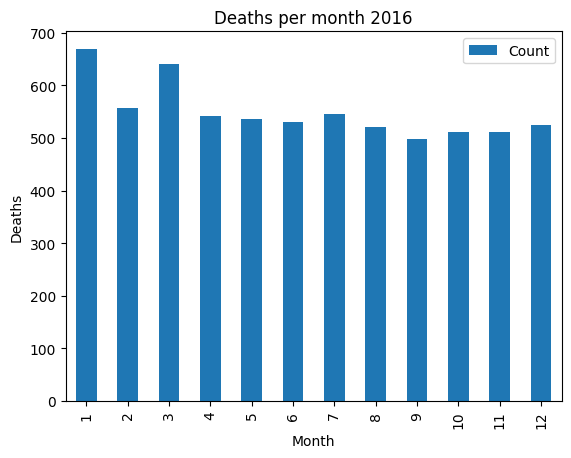

In [741]:
import matplotlib.pyplot as plt

ax = df_per_month.plot(x='month', y='count', kind='bar',
                       title='Deaths per month 2016')
ax.set_xlabel('Month')
ax.set_ylabel('Deaths')
ax.legend(['Count'])
plt.show()


In [742]:
def get_nationality(bio):
    return bio.strip().split(' ')[0]


df['nationality'] = df.apply(lambda row: get_nationality(row['bio']), 1)
df


,date of death,name,age,bio,cause_id,cause of death,month,year,nationality
0,2016-01-01,Tony Lane,71.0,American art director (Rolling Stone),8915.0,brain cancer,1,2016,American
1,2016-01-01,Gilbert Kaplan,74.0,American conductor and businessman,2860.0,cancer,1,2016,American
2,2016-01-01,Brian Johns,79.0,"Australian company director, managing director...",2860.0,cancer,1,2016,Australian
3,2016-01-01,Natasha Aguilar,45.0,"Costa Rican swimmer, silver and bronze medalis...",33897.0,complications of a stroke,1,2016,Costa
4,2016-01-01,Fazu Aliyeva,83.0,Russian Avar poet and journalist,10648.0,heart failure,1,2016,Russian Avar poet
...,...,...,...,...,...,...,...,...,...
6588,2015-05-14,BB King,89.0,Singer,10648.0,heart failure,5,2015,Singer
6589,2015-06-07,Christopher Lee,93.0,Actor,10648.0,heart failure,6,2015,Actor
6590,2015-07-31,Roddy Piper,61.0,Pro Wrestler,9047.0,heart attack,7,2015,Pro
6591,2015-09-22,Yogi Berra,90.0,Baseball Player,12202.0,natural causes,9,2015,Baseball


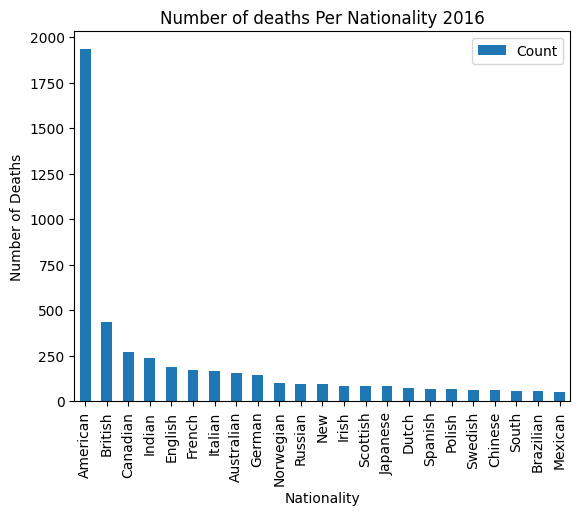

In [747]:
unlocky_countries = df.value_counts(
    ['nationality']).loc[lambda s: s > 50].reset_index(name='count')
ax = unlocky_countries.plot(
    x='nationality', y=1, kind='bar', title='Number of deaths Per Nationality 2016')
ax.set_xlabel('Nationality')
ax.set_ylabel('Number of Deaths')
ax.legend(['Count'])

plt.show()
